In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
import h5py
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [19]:
#cargo csvs:
data=pd.read_csv("./Features/features_augmented.csv")#training data
t1data=pd.read_csv("./Features/features_augmented_t1.csv")#test songs 1 row
t3data=pd.read_csv("./Features/features_augmented_t3.csv")#test songs 3 rows

In [20]:
X=data.drop('genre',axis=1)
Xt1=t1data.drop('genre',axis=1)
Xt3=t3data.drop('genre',axis=1)

In [21]:
y=data.genre
yt1=t1data.genre
yt3=t3data.genre

In [23]:
scaled_features = StandardScaler().fit_transform(X.values)
sc1=StandardScaler().fit_transform(Xt1.values)
sc3=StandardScaler().fit_transform(Xt3.values)

X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
Xt1=pd.DataFrame(sc1, index=Xt1.index, columns=Xt1.columns)
Xt3=pd.DataFrame(sc3, index=Xt3.index, columns=Xt3.columns)

In [24]:
X.shape

(8910, 77)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from keras import models
from keras import layers

model1 = models.Sequential()

model1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(10, activation='softmax'))

W0806 13:58:28.151765 139910981486400 deprecation_wrapper.py:119] From /home/maximiliano/miniconda3/envs/music/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 13:58:28.358479 139910981486400 deprecation_wrapper.py:119] From /home/maximiliano/miniconda3/envs/music/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 13:58:28.424620 139910981486400 deprecation_wrapper.py:119] From /home/maximiliano/miniconda3/envs/music/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 13:58:28.470852 139910981486400 deprecation_wrapper.py:119] From /home/maximiliano/miniconda3/envs/music/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.place

In [10]:

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0806 13:58:30.405306 139910981486400 deprecation_wrapper.py:119] From /home/maximiliano/miniconda3/envs/music/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 13:58:30.453934 139910981486400 deprecation_wrapper.py:119] From /home/maximiliano/miniconda3/envs/music/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
history = model1.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=256,validation_split=0.1)

W0806 13:58:32.906612 139910981486400 deprecation.py:323] From /home/maximiliano/miniconda3/envs/music/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6415 samples, validate on 713 samples
Epoch 1/50
6415/6415 [==============================] - 3s 537us/step - loss: 1.9881 - acc: 0.2765 - val_loss: 1.4758 - val_acc: 0.4909
Epoch 2/50
6415/6415 [==============================] - 0s 45us/step - loss: 1.4788 - acc: 0.4566 - val_loss: 1.1426 - val_acc: 0.6269
Epoch 3/50
6415/6415 [==============================] - 0s 45us/step - loss: 1.2510 - acc: 0.5504 - val_loss: 0.9706 - val_acc: 0.6872
Epoch 4/50
6415/6415 [==============================] - 0s 46us/step - loss: 1.0907 - acc: 0.6198 - val_loss: 0.8287 - val_acc: 0.7391
Epoch 5/50
6415/6415 [==============================] - 0s 45us/step - loss: 0.9729 - acc: 0.6553 - val_loss: 0.7451 - val_acc: 0.7574
Epoch 6/50
6415/6415 [==============================] - 0s 45us/step - loss: 0.9053 - acc: 0.6940 - val_loss: 0.6802 - val_acc: 0.7784
Epoch 7/50
6415/6415 [==============================] - 0s 55us/step - loss: 0.8274 - acc: 0.7208 - val_loss: 0.6299 - val_acc: 0.7896
Epoch 8

In [12]:
test_loss, test_acc = model1.evaluate(X_test,y_test)

1782/1782 [==============================] - 0s 70us/step


In [13]:
print(test_loss, test_acc)

0.2648810343074745 0.909652076118054


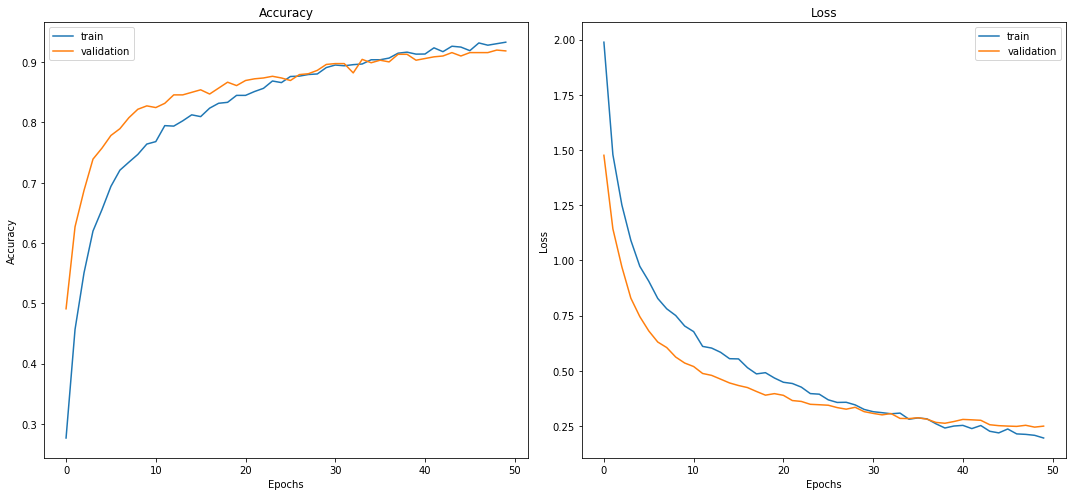

In [14]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


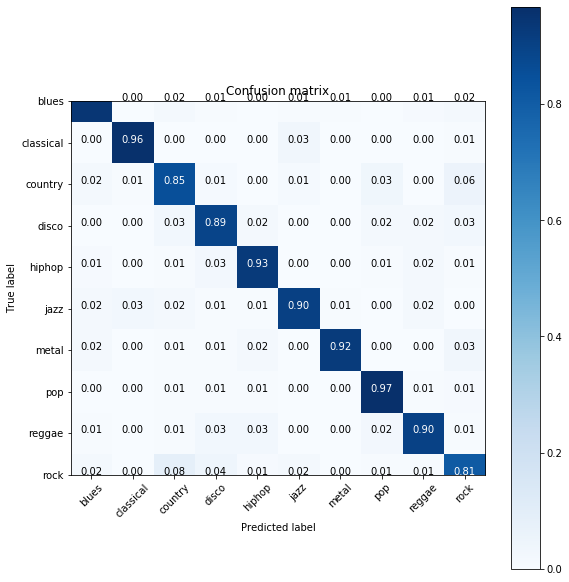

In [30]:
from sklearn.metrics import confusion_matrix
preds = model1.predict_classes(X_test)
cm = confusion_matrix(preds,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)

In [31]:
#
test_loss, test_acc = model1.evaluate(Xt1,yt1)
print(test_loss, test_acc)

10/10 [==============================] - 0s 726us/step
0.7227872610092163 0.800000011920929


In [32]:
model1.predict_classes(Xt1)

array([2, 1, 2, 3, 4, 5, 6, 7, 9, 9])

In [33]:
test_loss, test_acc = model1.evaluate(Xt3,yt3)
print(test_loss, test_acc)

30/30 [==============================] - 0s 224us/step
0.7987337708473206 0.800000011920929


In [34]:
for i in model1.predict_classes(Xt3):
    print (i)

0
0
8
1
1
1
2
2
0
3
3
3
4
4
4
5
5
5
3
6
6
7
7
7
9
9
9
9
9
9


In [35]:
test_loss, test_acc = model1.evaluate(X_test,y_test)
print(test_loss, test_acc)

1782/1782 [==============================] - 0s 53us/step
0.2648810343074745 0.909652076118054
